# 2019년 12월 19일 

- TimeDistributed

In [12]:
import numpy as np

from tensorflow.keras.models import Sequentialquential

from tensorflow.keras.layers import TimeDistributed, Dense, Conv2D
from tensorflow.keras.datasets import mnist

In [8]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [126]:
model = Sequential()

In [ ]:
# 28*28이 weight값은 공유한채 4개의 덴스노드에 차례대로 3개씩 들어온다는 것이다. 
# 3개씩들어오는건 누가 정함? 
layer1 = TimeDistributed(Dense(4), input_shape = (3,28*28,))

In [129]:
model.add(layer1)

In [138]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_23 (TimeDis (None, 3, 4)              3140      
Total params: 3,140
Trainable params: 3,140
Non-trainable params: 0
_________________________________________________________________


In [132]:
X_train[:3].reshape(1,3,28*28).shape

(1, 3, 784)

In [136]:
model.predict(X_train[:3].reshape(1,3,28*28))

array([[[   3.963909 ,    1.7044296,   -3.746704 ,   26.043089 ],
        [  96.46564  , -120.95054  ,   33.101364 ,   50.86691  ],
        [  -8.046024 , -105.5426   ,   60.094498 ,  -99.74839  ]]],
      dtype=float32)

In [139]:
model2 = Sequential()

In [140]:
layer2 = TimeDistributed(Conv2D(16, (3,3)), input_shape = (3, 28,28,1))

In [141]:
model2.add(layer2)

In [142]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_25 (TimeDis (None, 3, 26, 26, 16)     160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [143]:
y_train.shape

(60000,)

In [146]:
# 2는 batch size 
# 3개가 들어간다는 것  (TimeDistributed)
model2.predict(X_train[:6].reshape(2,3,28,28,1))

array([[[[[  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ]],

         [[  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       , ...,   0.       ,
             0.       ,   0.       ],
          ...,
          [  0

conv -> RPN -> RoI pooling -> timedistributed (묶음으로 순차적으로 들어감)

## Auto Encoder  

In [227]:
from tensorflow.keras.datasets import mnist

In [228]:
# unsupervised learning 
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [229]:
from tensorflow.keras.models import Sequential

In [230]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [231]:
X_train = X_train/255.
X_test = X_test/255.

In [232]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(28,28,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(28))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 28, 64)            1856      
_________________________________________________________________
dense_106 (Dense)            (None, 28, 32)            2080      
_________________________________________________________________
dense_107 (Dense)            (None, 28, 8)             264       
_________________________________________________________________
dense_108 (Dense)            (None, 28, 32)            288       
_________________________________________________________________
dense_109 (Dense)            (None, 28, 64)            2112      
_________________________________________________________________
dense_110 (Dense)            (None, 28, 28)            1820      
Total params: 8,420
Trainable params: 8,420
Non-trainable params: 0
___________________________________________________

In [91]:
model.compile(loss='mse', metrics = ['mse'], optimizer= 'adam')

In [92]:
X_train.shape

(60000, 28, 28)

In [93]:
model.output_shape

(None, 28, 28)

In [94]:
model.fit(X_train,X_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0077 - mse: 0.0077
Epoch 2/3
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0027 - mse: 0.0027
Epoch 3/3
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0023 - mse: 0.0023


In [95]:
model.evaluate(X_test, X_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.002158214037492871, 0.0021582134]

In [100]:
a = model.predict(X_train)[0]

In [101]:
a.shape

(28, 28)

In [102]:
import matplotlib.pyplot as plt

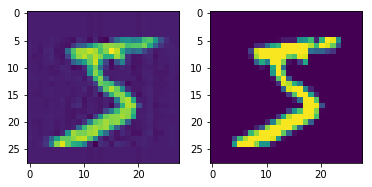

In [103]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(a)
axes[1].imshow(X_train[0])

- binary_crossentropy

In [80]:
model = Sequential()

In [81]:
model.add(Dense(64, activation='relu', input_shape=(28*28,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(28*28, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_45 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_47 (Dense)             (None, 784)               50960     
Total params: 105,944
Trainable params: 105,944
Non-trainable params: 0
________________________________________________

In [83]:
model.compile(loss='binary_crossentropy', optimizer= 'adam')

In [84]:
model.fit(X_test.reshape(-1,28*28), X_test.reshape(-1,28*28), epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 184us/sample - loss: 0.2877
Epoch 2/10
10000/10000 [==============================] - 1s 114us/sample - loss: 0.2203
Epoch 3/10
10000/10000 [==============================] - 1s 138us/sample - loss: 0.1823
Epoch 4/10
10000/10000 [==============================] - 1s 120us/sample - loss: 0.1705
Epoch 5/10
10000/10000 [==============================] - 1s 114us/sample - loss: 0.1638
Epoch 6/10
10000/10000 [==============================] - 1s 131us/sample - loss: 0.1595
Epoch 7/10
10000/10000 [==============================] - 1s 130us/sample - loss: 0.1568
Epoch 8/10
10000/10000 [==============================] - 1s 144us/sample - loss: 0.1547
Epoch 9/10
10000/10000 [==============================] - 2s 156us/sample - loss: 0.1530
Epoch 10/10
10000/10000 [==============================] - 1s 122us/sample - loss: 0.1515


In [85]:
a = model.predict(X_train.reshape(-1,28*28))[0]

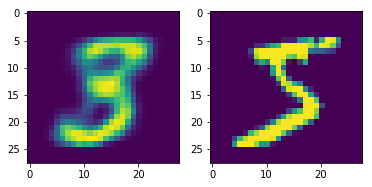

In [86]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(a.reshape(28,28))
axes[1].imshow(X_train[0])

- encoder / decoder 

In [140]:
layer1 = Dense(64, activation = 'relu', input_shape = (28*28,))
layer2 = Dense(32, activation = 'relu')
layer3 = Dense(8, activation = 'relu')
layer4 = Dense(28*28)
encoder = Sequential([layer1,layer2,layer3, layer4])

In [141]:
layer5 = Dense(32, activation='relu', input_shape=(8,))
layer6 = Dense(64, activation='relu')
layer7 = Dense(28*28, activation = 'sigmoid')
decoder = Sequential([layer5, layer6, layer7])

In [142]:
encoder.compile(loss= 'mse', optimizer= 'adam')

In [143]:
encoder.output_shape

(None, 784)

In [145]:
encoder.fit(X_train.reshape(-1,28*28),X_train.reshape(60000,28*28),epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0493
Epoch 2/2
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0452


In [146]:
a = ende.predict(X_train.reshape(-1,28*28))[0]

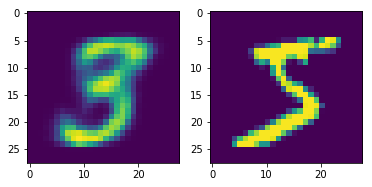

In [147]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(a.reshape(28,28))
axes[1].imshow(X_train[0])

In [127]:
ende = Sequential([encoder,decoder])

In [128]:
ende.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (None, 8)                 52584     
_________________________________________________________________
sequential_21 (Sequential)   (None, 784)               53360     
Total params: 105,944
Trainable params: 105,944
Non-trainable params: 0
_________________________________________________________________


In [129]:
ende.compile(loss='binary_crossentropy', optimizer= 'adam')

In [130]:
ende.fit(X_train.reshape(-1,28*28),X_train.reshape(-1,28*28),epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1896
Epoch 2/2
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1549


In [131]:
a = ende.predict(X_train.reshape(-1,28*28))[0]

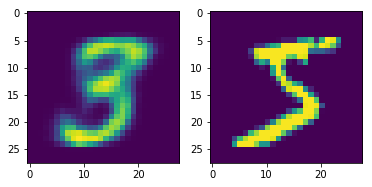

In [132]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(a.reshape(28,28))
axes[1].imshow(X_train[0])

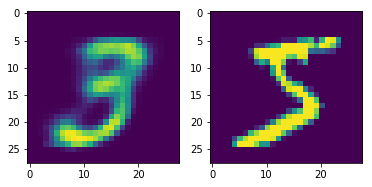

In [122]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(a.reshape(28,28))
axes[1].imshow(X_train[0])

## Building Autoencoders in Keras

https://blog.keras.io/building-autoencoders-in-keras.html

In [176]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model 
from tensorflow.keras import regularizers

### Deep autoencoder

- activity_regularizer=regularizers.l1(10e-5)

In [233]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
# kernel_regularizer, bias_regularizer 은 자기 자신값을 변형시켜버리기 때문에 쓰지 않는다.

# mse는 값이 너무 커진다. mse로 풀어도 상관없다.
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [234]:
encoder = Model(input_img, encoded)

encoded_output = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_output, decoder_layer(encoded_output))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train/255.
x_test = x_test/255.

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.6967 - val_loss: 0.6967
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.6965 - val_loss: 0.6965
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.6963 - val_loss: 0.6962
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.6960 - val_loss: 0.6960
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6958 - val_loss: 0.6958
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.6956 - val_loss: 0.6956
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.6954 - val_loss: 0.6954
Epoch 8/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6952 - val_loss: 0.6952
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.6950 - val

In [189]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

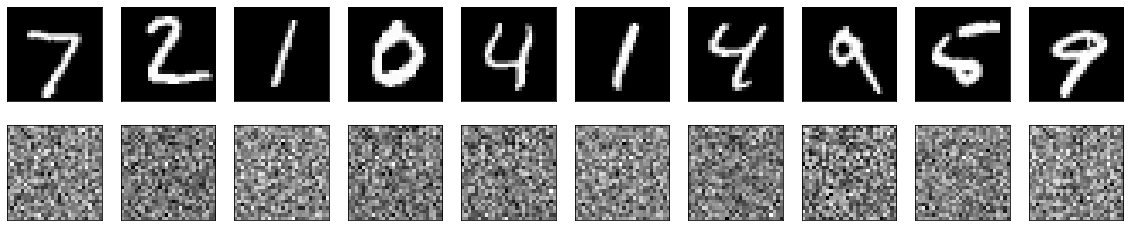

In [190]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Deep Autoencoder

sparse 방식

In [191]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [192]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.6942 - val_loss: 0.6941
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6941 - val_loss: 0.6941
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6940 - val_loss: 0.6940
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6939 - val_loss: 0.6939
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6938 - val_loss: 0.6938


### Convolutional autoencoder

stack 방식

In [24]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [25]:
import numpy as np

In [31]:
(x_train,_), (x_test,_) = mnist.load_data()
x_train = x_train/255.
x_test = x_test/255.
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [32]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16,(3,3), activation='relu', padding ='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
# padding: same - > valid
x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
# 마지막에 Conv2D 1로 해줘야한다.
decoded = Conv2D(1, (3,3), activation='sigmoid', padding = 'same')(x)

In [33]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# 2019년 12월 20일 

https://blog.keras.io/building-autoencoders-in-keras.html

- autoencoder: 결과값이 희미하게 나온다.

- gan: 결과값이 선명하게 나오지만, 학습이 잘 안된다. 

- fully connected 보다 convolution한 autoencoder가 성능이 더 좋다. 

In [3]:
import matplotlib.pyplot as plt

In [45]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

denosing 하기 위해 랜덤 노이즈

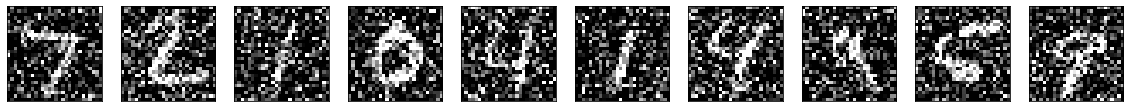

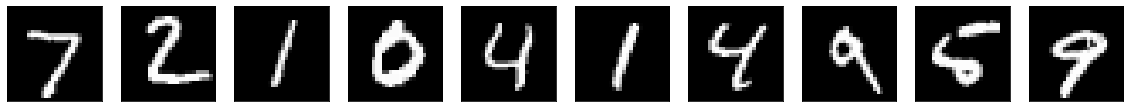

In [233]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 2))
for i in range(10):    
    ax = plt.subplot(1,10,1+i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [50]:
autoencoder.fit(x_train_noisy, x_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.4591
Epoch 2/2
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.4330


In [60]:
data = autoencoder.predict(x_test_noisy)

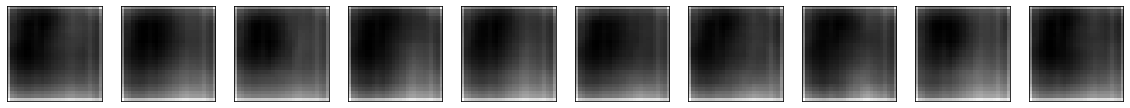

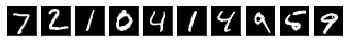

In [61]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
for i in range(10):    
    ax = plt.subplot(1,10,1+i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# fully connected 
# deep할 때 activity regularizer가 잘 되는지 확인해 보기

### Variational autoencoder (VAE)

- multi input/output

In [155]:
batch_size =128
original_dim = 2
intermediate_dim = 3
latent_dim =3

In [156]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

- Reparametrization 

Lambda(sampling,...) 

K : tensorflow, Theno, CNTK

In [157]:
# backend (?)
# 학습안하는 pattenr 
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., std=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
# 함수형 방식 , tensorflow에서는 lambda도 자동으로 output을 맞춰준다. (다른 라이브러리는 lambda output 못 맞춰준다.)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

NameError: name 'epsilon_std' is not defined

In [62]:
import numpy as np

In [63]:
import tensorflow as tf

In [65]:
np.random.normal()

-0.9482916172753142

In [ ]:
tf.random.random

- Tensorflow 모델 연산 

In [112]:
from tensorflow.keras.layers import Lambda, Dense, Add, Dot, Average, Concatenate

In [83]:
from tensorflow.keras.models import Sequential, Model

In [243]:
input1 = tf.keras.layers.Input(shape=(2,2))

In [244]:
layer1 = Dense(2, kernel_initializer='ones')(input1)
layer2 = Dense(2,  kernel_initializer='ones')(input1)

In [245]:
layer3 = Add()([layer1,layer2])

In [246]:
layer4 = Average()([layer1,layer2])

In [247]:
# 자동적으로 맞춰줄때 열로 붙여진다. (계산의 유연성을 위해서)
# (a*n)(n*b) -> n은 같아야한다. 따라서 열로 맞춘다. 
layer5 = Concatenate()([layer1,layer2])

In [248]:
layer6 = Dot(1)([layer1,layer2])

In [249]:
# lambda는 함수형 패러다임에 첫번째 인자로 들어갈 때 많이 쓴다.
layer7 = Lambda(lambda x: x**2)(layer1,layer2)

In [250]:
mo = Model(input1, layer3)

In [251]:
mo_1 = Model(input1,layer1)

In [252]:
mo_4 = Model(input1, layer4)

In [253]:
mo_5 = Model(input1, layer5)

In [254]:
mo_6 = Model(input1, layer6)

In [255]:
mo_7 = Model(input1, layer7)

In [256]:
mo.summary()
# multi inputs => Connected to 

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 2, 2)]       0                                            
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 2, 2)         6           input_16[0][0]                   
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 2, 2)         6           input_16[0][0]                   
__________________________________________________________________________________________________
add_7 (Add)                     (None, 2, 2)         0           dense_41[0][0]                   
                                                                 dense_42[0][0]            

In [258]:
x = np.array([[1,2],[3,4]])
# use_bias 

In [147]:
mo_7.predict(x[np.newaxis])

array([[[ 9.,  9.],
        [49., 49.]]], dtype=float32)

In [122]:
mo_6.predict(x[np.newaxis])

array([[[58., 58.],
        [58., 58.]]], dtype=float32)

In [117]:
mo_5.predict(x[np.newaxis])

array([[[3., 3., 3., 3.],
        [7., 7., 7., 7.]]], dtype=float32)

In [111]:
mo_4.predict(x[np.newaxis])

array([[[3., 3.],
        [7., 7.]]], dtype=float32)

In [259]:
mo_1.predict(x[np.newaxis])

array([[[3., 3.],
        [7., 7.]]], dtype=float32)

In [102]:
mo.predict(x[np.newaxis])

array([[[ 6.,  6.],
        [14., 14.]]], dtype=float32)

---

- 함수형 패러다임 

재활용하기 위해서 쓴다. 

In [203]:
# classification 문제로 환언하기 위해서 sigmoid를 썼다.
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

NameError: name 'z' is not defined

- Model 안에 Model을 넣을 수 있다. 

In [148]:
# 쪼개고 따로 쓰기 위해서 (각각 활용하기 위해서)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
# generator라고 한다. 
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

NameError: name 'x_decoded_mean' is not defined

- reconstruction loss  (다중 loss)

```python
def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss) # 함수형 패러다임 
```
- loss: 객체, 문자형, 상속, 함수로 만들 수 있다. ['여러개 넣을 수 있다.'] 하지만 loss 값은 한개


- bias/variance 최적화 

두개 loss를 줄일 때 전체 합이 작을 때를 찾기가 어려움. 

In [204]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

In [192]:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

In [193]:
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

NameError: name 'epsilon_std' is not defined

In [172]:
# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_23[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_23[0][0]                   
Total params: 403,972
Trainable params: 403,972
Non-trainable params: 0
____________________

In [175]:
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

NameError: name 'plot_model' is not defined

In [173]:
# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_25 (Dense)             (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________


NameError: name 'plot_model' is not defined

- outputs 개수 당 loss를 집어넣을 수 있다.

해보기

In [190]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_23[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_23[0][0]                   
Total params: 403,972
Trainable params: 403,972
Non-trainable params: 0
____________________

In [189]:
def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

# outputs 개수 당 loss를 집어넣을 수 있다.
encoder.compile(optimizer='rmsprop', loss=vae_loss )

NameError: name 'objectives' is not defined

### outputs 개수 당 loss를 집어넣을 수 있다.

In [205]:
x_train.shape

(60000, 784)

In [206]:
inp = Input(shape=(784))
layer1 = Dense(2, kernel_initializer='ones')(inp)
layer2 = Dense(2, kernel_initializer='ones')(inp)

# output이 2개
model = Model(inp,[layer1,layer2])

In [207]:
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 2)            1570        input_13[0][0]                   
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 2)            1570        input_13[0][0]                   
Total params: 3,140
Trainable params: 3,140
Non-trainable params: 0
__________________________________________________________________________________________________


In [208]:
def loss(x, pred):
    return (x-pred)**2

In [209]:
model.compile(optimizer='adam', loss=['mse',loss])

In [210]:
model.predict(np.array([[1.,2.],[3.,4.]])[np.newaxis])

ValueError: Error when checking input: expected input_13 to have 2 dimensions, but got array with shape (1, 2, 2)

In [211]:
model.fit(x_train,y_train)

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)]...

- 신진효분 코드 

## 임의로 output 2개, loss 2개인 모델 만들기

In [213]:
from tensorflow.keras.layers import Input, Dense

In [214]:
from tensorflow.keras.models import Model

In [216]:
inp = Input(shape=(28,28))
layer1 = Dense(2, kernel_initializer='ones')(inp)
layer2 = Dense(2, kernel_initializer='ones')(inp)

layer1_1 = Dense(28)(layer1)
layer2_1 = Dense(28)(layer2)

In [217]:
test_model = Model(inp, [layer1_1,layer2_1])

In [218]:
test_model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 28, 2)        58          input_15[0][0]                   
__________________________________________________________________________________________________
dense_38 (Dense)                (None, 28, 2)        58          input_15[0][0]                   
__________________________________________________________________________________________________
dense_39 (Dense)                (None, 28, 28)       84          dense_37[0][0]                   
___________________________________________________________________________________________

- output 2개 다 

In [219]:
test_model.output

[<tf.Tensor 'dense_39/Identity:0' shape=(None, 28, 28) dtype=float32>,
 <tf.Tensor 'dense_40/Identity:0' shape=(None, 28, 28) dtype=float32>]

- 임의로 만든 loss function

In [220]:
def custom_loss(x, pred):
    return (x-pred)**2 

In [222]:
test_model.compile(loss=['binary_crossentropy', custom_loss], optimizer='adam')

In [223]:
(x_train, _), (x_test, _) = mnist.load_data()

In [224]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

- target을 2개 넣는다. 

In [225]:
ht = test_model.fit(x_train, [x_train,x_train], epochs =5, batch_size=10)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 210us/sample - loss: 1.2913 - dense_39_loss: 1.1831 - dense_40_loss: 0.1081
Epoch 2/5
60000/60000 [==============================] - 12s 203us/sample - loss: 1.0790 - dense_39_loss: 1.0399 - dense_40_loss: 0.0392
Epoch 3/5
60000/60000 [==============================] - 12s 206us/sample - loss: 1.0745 - dense_39_loss: 1.0355 - dense_40_loss: 0.0390
Epoch 4/5
60000/60000 [==============================] - 11s 187us/sample - loss: 1.0735 - dense_39_loss: 1.0346 - dense_40_loss: 0.0390
Epoch 5/5
60000/60000 [==============================] - 11s 185us/sample - loss: 1.0719 - dense_39_loss: 1.0329 - dense_40_loss: 0.0390


- 기본 loss가 1개 나오고, 
- 지정한 loss가 각각 1개씩 나온다. 

In [226]:
ht.history

{'loss': [1.2912812048494815,
  1.0790308263997237,
  1.0744832996030649,
  1.0735437232951324,
  1.071898257335027],
 'dense_39_loss': [1.1831374, 1.0398649, 1.0354929, 1.034579, 1.0329417],
 'dense_40_loss': [0.10814286,
  0.039164938,
  0.03898862,
  0.038964037,
  0.038956292]}

- loss는 각각의 loss에 대한 합인가보다.(근사값)

In [266]:
for lt, l1, l2 in zip(*ht.history.values()):
    print(f"{lt} (lt) = {l1+l2} (l1+l2)")
    print(lt == l1+l2)

1.2912812048494815 (lt) = 1.2912802696228027 (l1+l2)
False
1.0790308263997237 (lt) = 1.0790297985076904 (l1+l2)
False
1.0744832996030649 (lt) = 1.07448148727417 (l1+l2)
False
1.0735437232951324 (lt) = 1.0735430717468262 (l1+l2)
False
1.071898257335027 (lt) = 1.0718979835510254 (l1+l2)
False


In [228]:
preds = test_model.predict(x_test[0][np.newaxis])

In [230]:
len(preds)

2

- input 1개에 대해서 output 2개가 나온다. 

In [231]:
preds[0].shape, preds[1].shape

((1, 28, 28), (1, 28, 28))

- 각각 다른 loss function이 적용된 것 같다.
- loss function만 다르게 하고 구조는 같은데, output 2개가 많이 다르다.
- 모델을 제대로 만들면 잘 나올 것 같다.

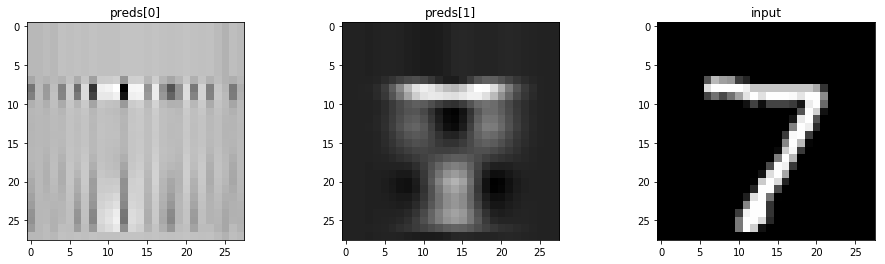

In [232]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,3,1)
ax1.imshow(preds[0].squeeze())
ax1.set_title('preds[0]')

ax2 = plt.subplot(1,3,2)
ax2.imshow(preds[1].squeeze())
ax2.set_title('preds[1]')

ax3 = plt.subplot(1,3,3)
ax3.imshow(x_test[0])
ax3.set_title('input')

plt.show()

https://keras.io/getting-started/functional-api-guide/